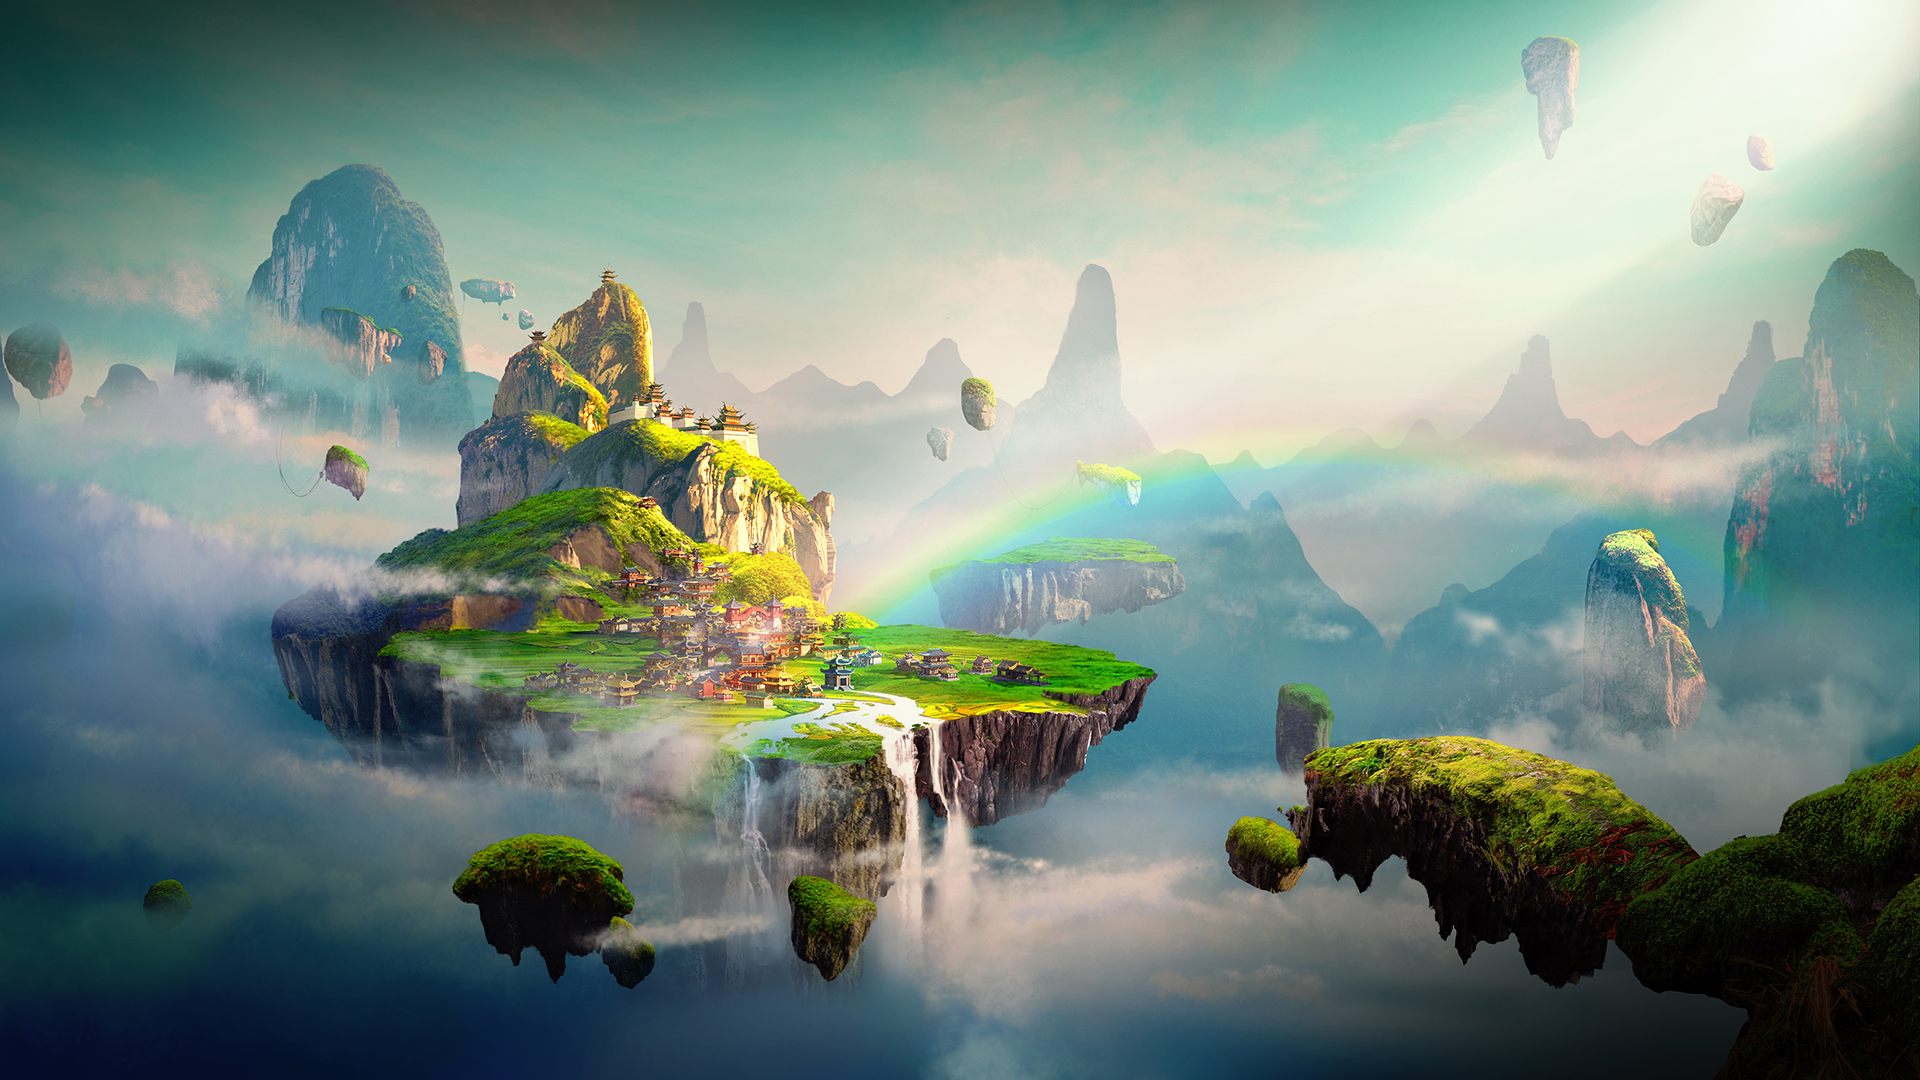

# <center> HEROS OF PYMOLI 
## <center> Swati Oberoi Dham

In [64]:
# Dependencies and Setup
import pandas as pd
import numpy as np
pd.options.display.float_format = '${:,.2f}'.format
# File to Load (Remember to Change These)||
file_to_load = "Resources/purchase_data.csv"

# Read Purchasing File and store into Pandas data frame
purchase_data = pd.read_csv(file_to_load)

#checking the data to clean
purchase_data.count()
#no null values


Purchase ID    780
SN             780
Age            780
Gender         780
Item ID        780
Item Name      780
Price          780
dtype: int64

In [65]:
# taking a look at data types for inconsistencies
purchase_data.dtypes

Purchase ID      int64
SN              object
Age              int64
Gender          object
Item ID          int64
Item Name       object
Price          float64
dtype: object

In [66]:
# ensring no mispelt item names 
purchase_data['Item Name'].unique()
#none

array(['Extraction, Quickblade Of Trembling Hands', 'Frenzied Scimitar',
       'Final Critic', 'Blindscythe', 'Fury', 'Dreamkiss',
       'Interrogator, Blood Blade of the Queen', 'Abyssal Shard',
       'Souleater', 'Ghastly Adamantite Protector',
       'Singed Onyx Warscythe', 'Renewed Skeletal Katana',
       "Bloodlord's Fetish", 'Bone Crushing Silver Skewer',
       'Deadline, Voice Of Subtlety', 'Second Chance', 'Devine',
       'Nirvana', 'Blazefury, Protector of Delusions',
       'Despair, Favor of Due Diligence',
       'Sun Strike, Jaws of Twisted Visions', 'Warped Fetish',
       'Severance', 'Persuasion',
       'Oathbreaker, Last Hope of the Breaking Storm', 'Demise',
       'Blood-Forged Skeletal Spine',
       'Stormbringer, Dark Blade of Ending Misery',
       'Shadow Strike, Glory of Ending Hope', 'Striker',
       'Wolf, Promise of the Moonwalker', "Faith's Scimitar",
       'Bonecarvin Battle Axe', 'Azurewrath', 'Vengeance Cleaver',
       'Haunted Bronzed Bludgeo

In [67]:
# taking a look at the data
purchase_data

,Purchase ID,SN,Age,Gender,Item ID,Item Name,Price
0,0,Lisim78,20,Male,108,"Extraction, Quickblade Of Trembling Hands",$3.53
1,1,Lisovynya38,40,Male,143,Frenzied Scimitar,$1.56
2,2,Ithergue48,24,Male,92,Final Critic,$4.88
3,3,Chamassasya86,24,Male,100,Blindscythe,$3.27
4,4,Iskosia90,23,Male,131,Fury,$1.44
...,...,...,...,...,...,...,...
775,775,Aethedru70,21,Female,60,Wolf,$3.54
776,776,Iral74,21,Male,164,Exiled Doomblade,$1.63
777,777,Yathecal72,20,Male,67,"Celeste, Incarnation of the Corrupted",$3.46
778,778,Sisur91,7,Male,92,Final Critic,$4.19


In [68]:
#changing column names to remove spaces and make them easier to use
purchase_data.rename(columns = {'Purchase ID': 'PurchaseID', 'Item ID': 'ItemID', 'Item Name': 'ItemName'}, inplace = True)


## Player Count

* Display the total number of players


In [69]:
unique_data = purchase_data['SN'].unique() # total number of unique players
unique_players = pd.DataFrame([{'Total Players':len(unique_data)}])
unique_players

,Total Players
0,576


## Purchasing Analysis (Total)

* Run basic calculations to obtain number of unique items, average price, etc.


* Create a summary data frame to hold the results


* Optional: give the displayed data cleaner formatting


* Display the summary data frame


In [70]:
unique_item = len(purchase_data['ItemID'].unique())
total_revenue = purchase_data['Price'].sum()
num_purchase = len(purchase_data)
avg_purchase = total_revenue/num_purchase
# favg_purchase = "${:.2f}".format(avg_purchase) # formatted values
# ftotal_revenue = "${:.2f}".format(total_revenue) #formatted values
purchase_analysis = pd.DataFrame([{'Number of Unique Items':unique_item, 'Average Price': avg_purchase, 'Number of Purchases': num_purchase,
                            'Total Revenue': total_revenue}])
purchase_analysis

,Number of Unique Items,Average Price,Number of Purchases,Total Revenue
0,179,$3.05,780,"$2,379.77"


## Gender Demographics

* Percentage and Count of Male Players


* Percentage and Count of Female Players


* Percentage and Count of Other / Non-Disclosed




In [71]:
# Counting Total Number of players
total_count = purchase_data['SN'].count()
#total number of players Genderwise
g_tcount = purchase_data.groupby('Gender').SN.count()
#Percentage of players Genderwise
percent = (round(((g_tcount/total_count)*100),2)).astype(str).add('%')
gender = pd.DataFrame({'Total Count':g_tcount, 'Percentage of Players': percent })
gender_demographics = gender.sort_values(by= 'Total Count', ascending = False)

gender_demographics

,Total Count,Percentage of Players
Gender,,
Male,652,83.59%
Female,113,14.49%
Other / Non-Disclosed,15,1.92%



## Purchasing Analysis (Gender)

* Run basic calculations to obtain purchase count, avg. purchase price, avg. purchase total per person etc. by gender




* Create a summary data frame to hold the results


* Optional: give the displayed data cleaner formatting


* Display the summary data frame

In [72]:
total_value = purchase_data.groupby('Gender').Price.sum() #total purchase value - genderwise
avg_price = purchase_data.groupby('Gender').Price.mean() #average purchase prise - genderwise
#calculating total number of unique players in each gender
new_gender = purchase_data[['Gender','SN']] # new mini data frame extarcted with gender and player name SN
new_gender = new_gender.drop_duplicates() # dropped repeating values
unique_count = (new_gender.groupby('Gender').count()).SN #counting unique number of players - genderwise
avg_total_pp = total_value/unique_count # average total purchase per person
purchase_analysis_gender = pd.DataFrame({'Purchase Count':g_tcount, 'Avg Purchase Price':avg_price, 'Total Purchase Value': total_value, 'Avg Total Purchase per Person': avg_total_pp})

purchase_analysis_gender



,Purchase Count,Avg Purchase Price,Total Purchase Value,Avg Total Purchase per Person
Gender,,,,
Female,113,$3.20,$361.94,$4.47
Male,652,$3.02,"$1,967.64",$4.07
Other / Non-Disclosed,15,$3.35,$50.19,$4.56


## Age Demographics

* Establish bins for ages


* Categorize the existing players using the age bins. Hint: use pd.cut()


* Calculate the numbers and percentages by age group


* Create a summary data frame to hold the results


* Optional: round the percentage column to two decimal points


* Display Age Demographics Table


In [73]:
#cutting the data into bins basedon age groups
my_bins = pd.cut(x = purchase_data['Age'], bins= [1,9,14,19,24,29,34,39,100],right = True, labels=['<10','10-14','15-19','20-24','25-29','30-34','35-39','>40'])
purchase_data['bins'] = my_bins
b_count  = purchase_data.groupby('bins').SN.count() #counting members per bin
percent_bin = (round(((b_count/total_count)*100),2)).astype(str).add('%')
age_analysis = pd.DataFrame({'Total Count':b_count, 'Percentage of Players': percent_bin })
age_analysis = age_analysis.rename(index ={'bins': 'Age'})
age_analysis

,Total Count,Percentage of Players
bins,,
<10,23,2.95%
10-14,28,3.59%
15-19,136,17.44%
20-24,365,46.79%
25-29,101,12.95%
30-34,73,9.36%
35-39,41,5.26%
>40,13,1.67%


## Purchasing Analysis (Age)

* Bin the purchase_data data frame by age


* Run basic calculations to obtain purchase count, avg. purchase price, avg. purchase total per person etc. in the table below


* Create a summary data frame to hold the results


* Optional: give the displayed data cleaner formatting


* Display the summary data frame

In [77]:
#cutting the data into bins basedon age groups
purchase_data['bins'] = pd.cut(x = purchase_data['Age'], bins= [1,9,14,19,24,29,34,39,100],right = True, labels=['<10','10-14','15-19','20-24','25-29','30-34','35-39','>40'])
b_count  = purchase_data.groupby('bins').SN.count() #counting members per bin
average_price =purchase_data.groupby('bins').Price.mean() #average price per bin
total_value= (round(purchase_data.groupby('bins').Price.sum(),2)) #total value per bin
#new dataframe to find unique values
newdf = purchase_data[['SN','bins']]
newdf = newdf.drop_duplicates()
b_unique_player = newdf.groupby('bins').SN.count() #no. of unique players per bin
b_avg_t_pp = total_value /b_unique_player #average total purchase per person

age_demo = pd.DataFrame({'Purchase Count': b_count , 'Average Purchase Price' : average_price , 'Total Purchase Value' : total_value , 'Avg Total Purchase per Person': b_avg_t_pp})
age_demo.rename(index = {'bins':'Age Analysis'}, inplace = True)
age_demo

,Purchase Count,Average Purchase Price,Total Purchase Value,Avg Total Purchase per Person
bins,,,,
<10,23,$3.35,$77.13,$4.54
10-14,28,$2.96,$82.78,$3.76
15-19,136,$3.04,$412.89,$3.86
20-24,365,$3.05,"$1,114.06",$4.32
25-29,101,$2.90,$293.00,$3.81
30-34,73,$2.93,$214.00,$4.12
35-39,41,$3.60,$147.67,$4.76
>40,13,$2.94,$38.24,$3.19


## Top Spenders

* Run basic calculations to obtain the results in the table below


* Create a summary data frame to hold the results


* Sort the total purchase value column in descending order


* Optional: give the displayed data cleaner formatting


* Display a preview of the summary data frame



In [75]:
count = purchase_data.groupby('SN').PurchaseID.count()#Total No. of Purchases Playerwise
avg = purchase_data.groupby('SN').Price.mean() #Average Purchase price Playerwise
total = purchase_data.groupby('SN').Price.sum() #Total Purchase Value Playerwise
spend_df = pd.DataFrame({'Purchase Count': count,'Average Purchase Price': avg, 'Total Purchase Value': total})
spend_df.sort_values(by = 'Total Purchase Value', ascending =False).head()

,Purchase Count,Average Purchase Price,Total Purchase Value
SN,,,
Lisosia93,5,$3.79,$18.96
Idastidru52,4,$3.86,$15.45
Chamjask73,3,$4.61,$13.83
Iral74,4,$3.40,$13.62
Iskadarya95,3,$4.37,$13.10


## Most Popular Items

* Retrieve the Item ID, Item Name, and Item Price columns


* Group by Item ID and Item Name. Perform calculations to obtain purchase count, average item price, and total purchase value


* Create a summary data frame to hold the results


* Sort the purchase count column in descending order


* Optional: give the displayed data cleaner formatting


* Display a preview of the summary data frame



In [61]:
item = purchase_data.groupby('ItemID').ItemName.first() #Item Name 
count = purchase_data.groupby('ItemID').SN.count() #No. of Purchases item-wise
avg = purchase_data.groupby('ItemID').Price.mean() #Average price of the item
total = purchase_data.groupby('ItemID').Price.sum() #Total Purchase Value of the item

popular_df = pd.DataFrame({'Item Name': item , 'Purchase Count':count, 'Item Price': avg, 'Total Purchase Value': total})
popular_df = popular_df.sort_values(by = 'Purchase Count', ascending = False)

popular_df.head()

,Item Name,Purchase Count,Item Price,Total Purchase Value
ItemID,,,,
92,Final Critic,13,$4.61,$59.99
178,"Oathbreaker, Last Hope of the Breaking Storm",12,$4.23,$50.76
145,Fiery Glass Crusader,9,$4.58,$41.22
132,Persuasion,9,$3.22,$28.99
108,"Extraction, Quickblade Of Trembling Hands",9,$3.53,$31.77


## Most Profitable Items

* Sort the above table by total purchase value in descending order


* Optional: give the displayed data cleaner formatting


* Display a preview of the data frame



In [59]:
profit_df = popular_df.sort_values(by = 'Total Purchase Value', ascending = False) #sorting table based on total purchase to identify the most profitable item
profit_df.head()

,Item Name,Purchase Count,Item Price,Total Purchase Value
ItemID,,,,
92,Final Critic,13,$4.61,$59.99
178,"Oathbreaker, Last Hope of the Breaking Storm",12,$4.23,$50.76
82,Nirvana,9,$4.90,$44.10
145,Fiery Glass Crusader,9,$4.58,$41.22
103,Singed Scalpel,8,$4.35,$34.80
